In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
data_scaled = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


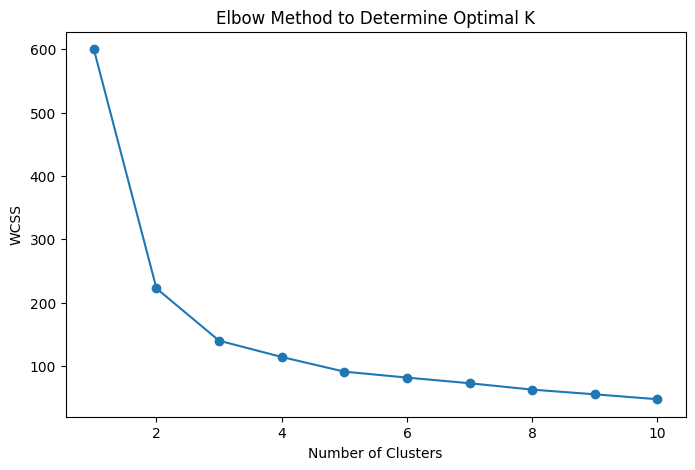

In [7]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [8]:

def clustering_analysis(X, title):
    results = {}

    for n_clusters in [2,3,4]:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels_kmeans = kmeans.fit_predict(X)

        hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
        labels_hierarchical = hierarchical.fit_predict(X)

        meanshift = MeanShift()
        labels_meanshift = meanshift.fit_predict(X)

        results[f'KMeans_c={n_clusters}'] = [
            silhouette_score(X, labels_kmeans),
            calinski_harabasz_score(X, labels_kmeans),
            davies_bouldin_score(X, labels_kmeans)
        ]

        results[f'Hierarchical_c={n_clusters}'] = [
            silhouette_score(X, labels_hierarchical),
            calinski_harabasz_score(X, labels_hierarchical),
            davies_bouldin_score(X, labels_hierarchical)
        ]

        results[f'MeanShift_c={n_clusters}'] = [
            silhouette_score(X, labels_meanshift),
            calinski_harabasz_score(X, labels_meanshift),
            davies_bouldin_score(X, labels_meanshift)
        ]

    df_results = pd.DataFrame(results, index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])
    print(f"Results for {title}")
    print(df_results)
    return df_results

In [9]:

raw_results = clustering_analysis(data, "Raw Data")
scaled_results = clustering_analysis(data_scaled, "Normalized Data")
pca_results = clustering_analysis(data_pca, "PCA Transformed Data")

Results for Raw Data
                   KMeans_c=2  Hierarchical_c=2  MeanShift_c=2  KMeans_c=3  \
Silhouette Score     0.681046          0.686735       0.685788    0.552819   
Calinski-Harabasz  513.924546        502.821564     509.703427  561.627757   
Davies-Bouldin       0.404293          0.382753       0.388552    0.661972   

                   Hierarchical_c=3  MeanShift_c=3  KMeans_c=4  \
Silhouette Score           0.554324       0.685788    0.498051   
Calinski-Harabasz        558.058041     509.703427  530.765808   
Davies-Bouldin             0.656256       0.388552    0.780307   

                   Hierarchical_c=4  MeanShift_c=4  
Silhouette Score           0.488967       0.685788  
Calinski-Harabasz        515.078906     509.703427  
Davies-Bouldin             0.795264       0.388552  
Results for Normalized Data
                   KMeans_c=2  Hierarchical_c=2  MeanShift_c=2  KMeans_c=3  \
Silhouette Score     0.581750          0.577035       0.581750    0.459948   
Calin

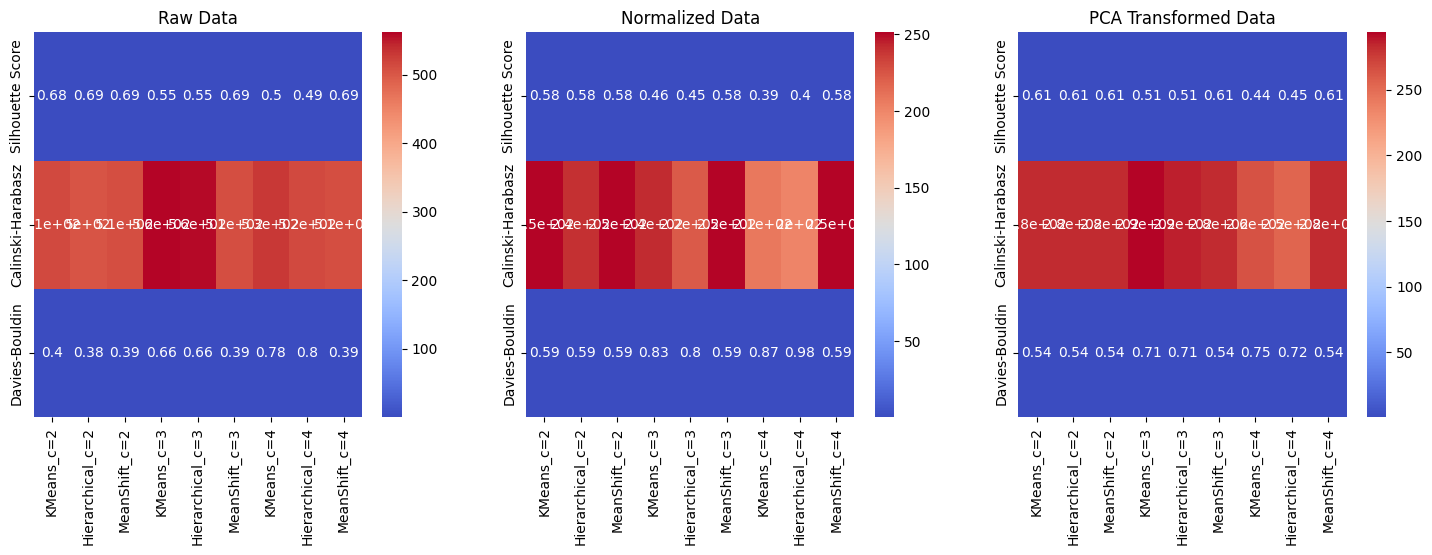

In [10]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(raw_results, annot=True, ax=axes[0], cmap='coolwarm')
axes[0].set_title("Raw Data")
sns.heatmap(scaled_results, annot=True, ax=axes[1], cmap='coolwarm')
axes[1].set_title("Normalized Data")
sns.heatmap(pca_results, annot=True, ax=axes[2], cmap='coolwarm')
axes[2].set_title("PCA Transformed Data")
plt.show()

In [15]:
import pandas as pd
from google.colab import files

def save_results(df, filename):
    df.to_csv(filename, index=False)
    files.download(filename)

combined_results = pd.concat([raw_results, scaled_results, pca_results], keys=["Raw Data", "Normalized Data", "PCA Transformed Data"])

save_results(combined_results, "Clustering_Results_Combined.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>